# Assignment #1 

This experiment generates two samples, water and beer.  The skeptic says that there is no difference between the two groups.  The classical approach is to do a two sample t-test (we will see that later).  The numerical approach is to shuffle the data many times and calculate how likely is to get a result as extreme or more than the experiment.

We need to shuffle an exisiting sample because we don't have a way to generate data that follows the distribution of water and beer (DGP - Data Generation Process).

We will use numpy library.  One of the reasons NumPy is so important for numerical computations in Python is because it is designed for efficiency on large arrays of data.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import statistics
import seaborn as sns

In [2]:
data =pd.read_csv('mosquitos_data-2.csv')
data

,Response,Treatment
0,27,Beer
1,20,Beer
2,21,Beer
3,26,Beer
4,27,Beer
5,31,Beer
6,24,Beer
7,21,Beer
8,20,Beer
9,19,Beer


Text(0.5, 1.0, 'Musquitos Responses')

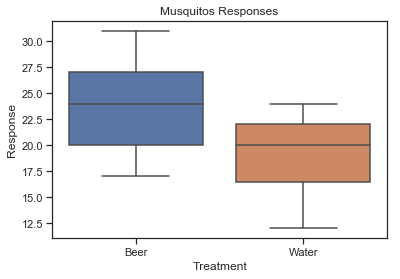

In [3]:
sns.set(style='ticks')
sns.boxplot(x='Treatment', y='Response', data=data)
plt.title('Musquitos Responses')

This graph shows a comparison of Water vs. Beer treatment individual, ranging from 12 to 30 mosquitos. 
1. The median of beer treatment is higher than the median of water treatment. 
2. The median of the beer treatment, 24 mosquitos, is close to the higher interquartile of the water treatment group. 
3. The median of the water treatment group, 20 mosquitos, is close to the lower interquartile of the beer treatment group. 

Therefore, it would support that individuals who had the beer treatment were more attractive to mosquitos than the individuals who had the water treatment.

In [4]:
#Create an array for beer treatment 
beer_array = np.array(data[data['Treatment']=='Beer']['Response'])
beer_array

array([27, 20, 21, 26, 27, 31, 24, 21, 20, 19, 23, 24, 28, 19, 24, 29, 18,
       20, 17, 31, 20, 25, 28, 21, 27], dtype=int64)

In [5]:
water_array = np.array(data[data['Treatment']=='Water']['Response'])
water_array

array([21, 22, 15, 12, 21, 16, 19, 15, 22, 24, 19, 23, 13, 22, 20, 24, 18,
       20], dtype=int64)

In [6]:
beer = [27, 20, 21, 26, 27, 31, 24, 21, 20, 19, 23, 24, 28, 19, 24, 29, 18,
       20, 17, 31, 20, 25, 28, 21, 27]
water = [21, 22, 15, 12, 21, 16, 19, 15, 22, 24, 19, 23, 13, 22, 20, 24, 18,
       20]

In [7]:
beer_mean = statistics.mean(beer)
beer_median = statistics.median(beer)
beer_std = statistics.stdev(beer)
water_mean = statistics.mean(water)
water_median = statistics.median(water)
water_std = statistics.stdev(water)

In [8]:
print('Mean for Beer Responses is %s' % beer_mean)
print('Median for Beer Responses is %s' % beer_median)
print('Standard Deviation for Beer Responses is %s' % beer_std)

Mean for Beer Responses is 23.6
Median for Beer Responses is 24
Standard Deviation for Beer Responses is 4.133198922545748


In [9]:
print('Mean for Water Responses is %s' % water_mean)
print('Median for Water Responses is %s' % water_median)
print('Standard Deviation for Water Responses is %s' % water_std)

Mean for Water Responses is 19.22222222222222
Median for Water Responses is 20.0
Standard Deviation for Water Responses is 3.6711202899124045


In [10]:
observed_mean = beer_mean-water_mean
observed_mean

4.37777777777778

On average, around 23.6 mosquitos are attracted to beer individuals, while the average number of mosquitos attracted to water treatment individuals is 19.2. As we saw in the box plot, the medians are 24 and 20 for the beer and water treatments. The difference is around 4.38 mosquitos, which corresponds to the standard deviation of 4.13 and 3.67 mosquitos, for beer and water treatment.

In [11]:
mean_diff = []
for i in range(0,50000):
    dataset = np.array(data['Response'])
    np.random.shuffle(dataset)
    array_split = np.split(dataset,[0,25],axis=0)
    array_1_split = array_split[1]
    array_2_split = array_split[2]
    diff = array_1_split.mean()-array_2_split.mean()
    mean_diff.append(diff)

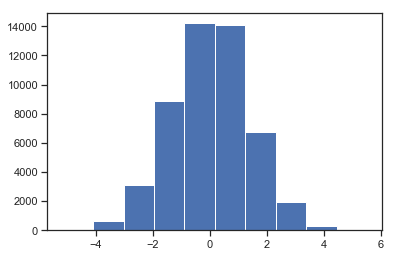

In [12]:
plt.hist(mean_diff)
plt.show()

In [13]:
#the p-value is obtained by counting the proportion of statistics 
#(including the actual observed difference) among greater than or equal to the observed statistic:
sum = 0
for item in mean_diff:
    if abs(item) >= observed_mean:
        sum = sum + 1

In [14]:
p_value = sum / 50000
p_value

0.00096

In [15]:
print('The probability of obtaining the experiment outcome is %s' % p_value)

The probability of obtaining the experiment outcome is 0.00096
